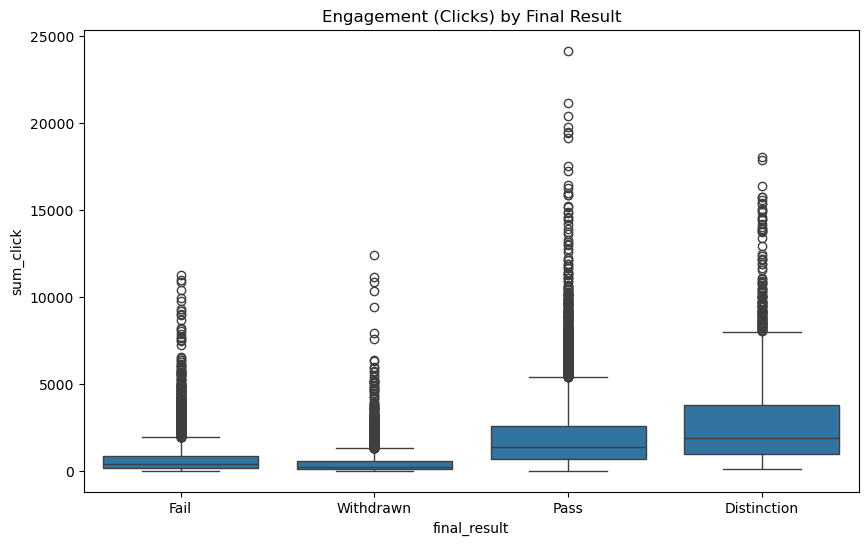

C:\Users\User\AppData\Local\Temp\ipykernel_33984\2017924783.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


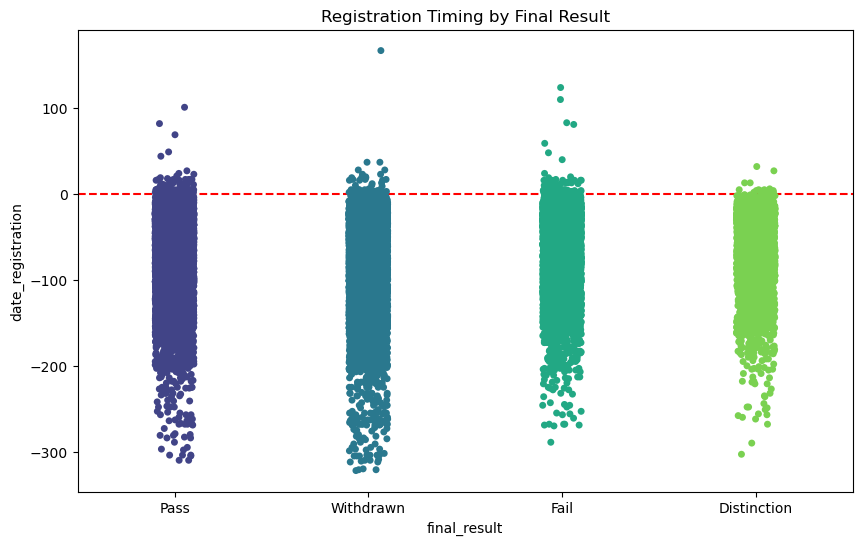

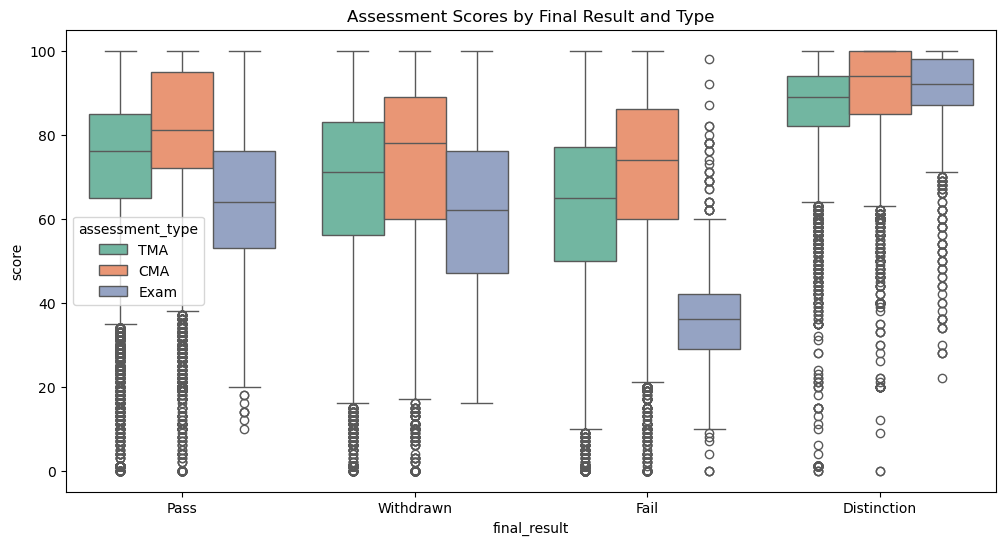

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_datasets():
    return {
        'courses': pd.read_csv('courses.csv'),
        'assessments': pd.read_csv('assessments.csv'),
        'vle': pd.read_csv('vle.csv'),
        'student_info': pd.read_csv('studentInfo.csv'),
        'student_reg': pd.read_csv('studentRegistration.csv'),
        'student_assess': pd.read_csv('studentAssessment.csv'),
        'student_vle': pd.read_csv('studentVle.csv')
    }
    
def result_against_engagement(student_vle, student_info):
    # Merging student info with VLE interactions
    engagement = student_vle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum().reset_index()
    merged_data = pd.merge(student_info, engagement, on=['code_module', 'code_presentation', 'id_student'])
    
    # Box plot: Clicks vs. Final Result (numeric conversion)
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=merged_data,
        x='final_result',  # Categorical on x-axis
        y='sum_click',    # Numerical on y-axis
        order=["Fail", "Withdrawn", "Pass", "Distinction"]  # Optional: control order
    )
    plt.title("Engagement (Clicks) by Final Result")
    plt.show()

def result_against_registration_date(student_reg, student_info):
    # Merging registration data with student info
    reg_vs_result = pd.merge(student_reg, student_info, on=['code_module', 'code_presentation', 'id_student'])
    
    # Strip Plot
    plt.figure(figsize=(10, 6))
    sns.stripplot(
        data=reg_vs_result,
        x='final_result',
        y='date_registration',
        jitter=True,  # Avoids overplotting
        palette="viridis"
    )
    plt.axhline(0, color='red', linestyle='--', label='Start Date')
    plt.title("Registration Timing by Final Result")
    plt.show()

def result_against_assessment_scores(student_assess, student_info):
    # Merging assessment scores with student info
    scores_vs_result = pd.merge(
    student_assess,
    assessments[['id_assessment', 'assessment_type']],  # Include needed columns
    on='id_assessment',
    how='left'
    )
    
    # Then merging with student_info to get 'final_result'
    scores_vs_result = pd.merge(
        scores_vs_result,
        student_info[['id_student', 'final_result']],
        on='id_student',
        how='left'
    )
    
    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=scores_vs_result,
        x='final_result',
        y='score',
        hue='assessment_type',  # Differentiates TMA/CMA/Exam
        palette="Set2"
    )
    plt.title("Assessment Scores by Final Result and Type")
    plt.show()

data = load_datasets()
result_against_engagement(data['student_vle'], data['student_info'])
result_against_registration_date(data['student_reg'], data['student_info'])
result_against_assessment_scores(data['student_assess'], data['student_info'])